In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance1/insurance.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
data = pd.read_csv("/kaggle/input/insurance1/insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.shape

(1338, 7)

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


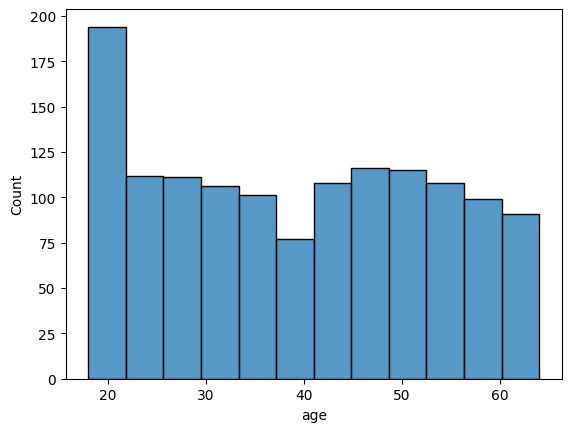

In [10]:
sns.histplot(x=data['age'])
plt.show()

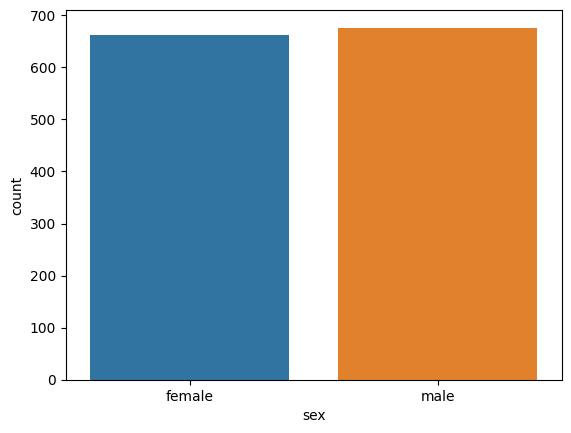

In [11]:
sns.countplot(x=data['sex'])
plt.show()

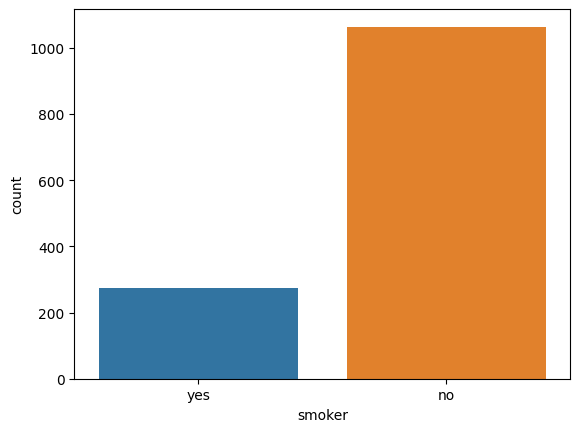

In [12]:
sns.countplot(x=data['smoker'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='charges'>

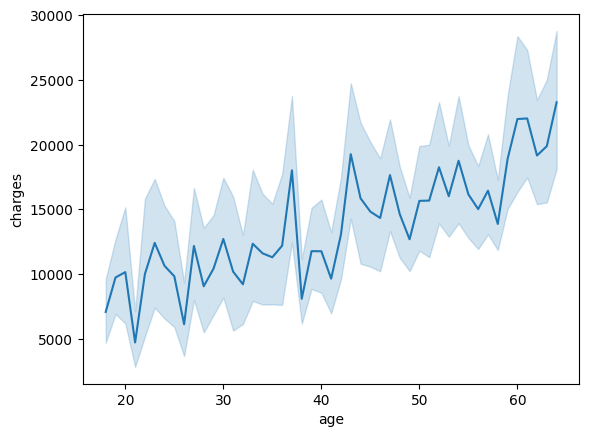

In [13]:
sns.lineplot(x=data['age'],y=data['charges'] )

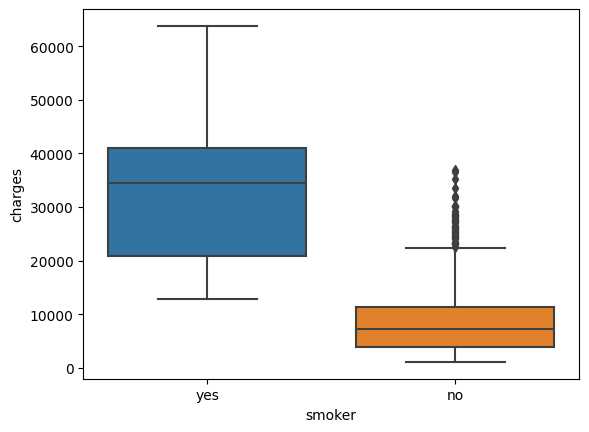

In [14]:
sns.boxplot(x=data['smoker'],y=data['charges'])
plt.show()

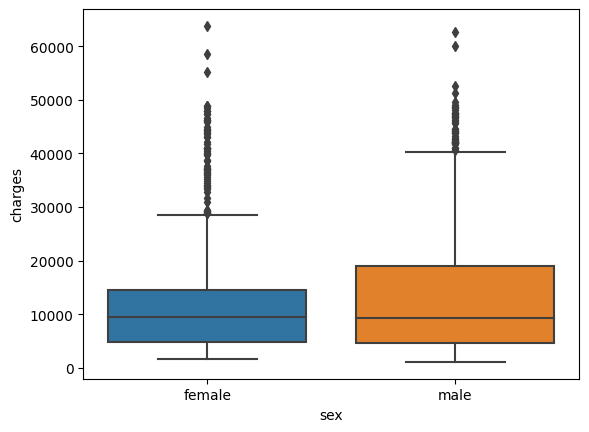

In [15]:
sns.boxplot(x=data['sex'],y=data['charges'], data=data[data['smoker']=='no'])
plt.show()

In [16]:
nonSmokerDf = data[data['smoker']=='no']
nonSmokerDf.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [17]:
nonSmokerDf[nonSmokerDf["charges"]>38000]

,age,sex,bmi,children,smoker,region,charges


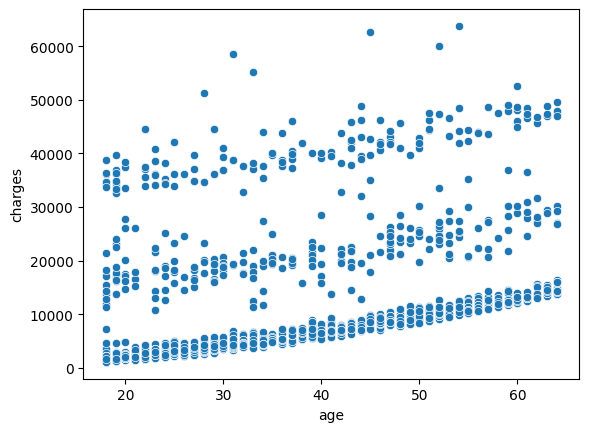

In [18]:
sns.scatterplot(x=data['age'], y=data['charges'])
plt.show()

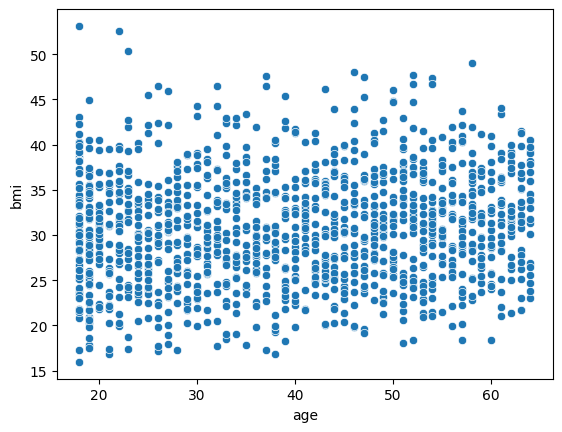

In [19]:
sns.scatterplot(x=data['age'], y=data['bmi'])
plt.show()

In [20]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
genderDict = {"male":1,"female":0}
data["sex"] = data["sex"].map(genderDict)

In [22]:
smokerDict = {"yes":1,"no":0}
data["smoker"] = data["smoker"].map(smokerDict)

In [23]:
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

dataNumeric = data.select_dtypes(include=["number"])
corrMatrix = dataNumeric.corr()
sns.heatmap(corrMatrix,annot=True,cmap="coolwarm")'''

'from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers=[(\'encoder\', OneHotEncoder(), [5])], remainder=\'passthrough\')\nx = np.array(ct.fit_transform(x))\nprint(x)\n\ndataNumeric = data.select_dtypes(include=["number"])\ncorrMatrix = dataNumeric.corr()\nsns.heatmap(corrMatrix,annot=True,cmap="coolwarm")'

In [24]:
#x = XCOL.iloc[:,:-1].values
x = data[["bmi", "age", "smoker"]]
y = data.iloc[:, -1].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=5)

In [26]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [27]:
r2 = r2_score(y_test, y_pred_lr)
print(r2)

0.7637743427334377


In [28]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [29]:
y_pred_dtr = dtr.predict(x_test)

In [30]:
r2_dtr = r2_score(y_test, y_pred_dtr)
print(r2_dtr)

0.6606558166854406


In [31]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
y_pred_rf=rf_model.predict(x_test)

In [33]:
r2_rf = r2_score(y_test, y_pred_rf)
print(r2_rf)

0.819847696356353


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 1.0, 'Actual vs Predicted values for Regression')

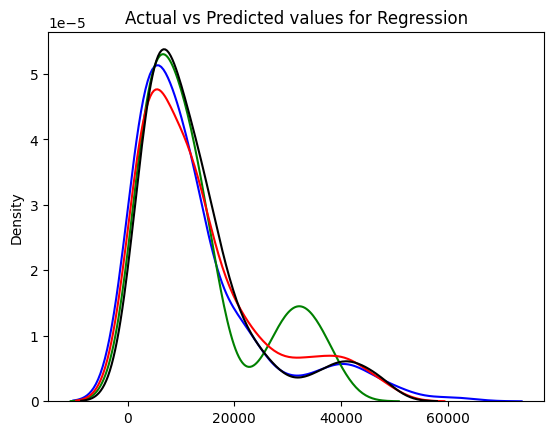

In [34]:
sns.kdeplot(y_test, label='Actual',color='b')
sns.kdeplot(y_pred_lr, label='Predicted (lr)',color='g')
sns.kdeplot(y_pred_dtr, label='Predicted (dtr)',color='r')
sns.kdeplot(y_pred_rf, label='Predicted (rf)',color='black')
plt.title("Actual vs Predicted values for Regression")